# HIPÓTESIS: En qué pais es menos arriesgado salir de pesca

##### Importo bibliotecas y el archivo csv

In [193]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import re
df = pd.read_csv("input/attacks.csv",encoding='ISO-8859-1')
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


##### Limpio el DF corrigiendo errores para facilitar el análisis de los datos

In [2]:
print(df.shape)
df.columns

(25723, 24)


Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

##### Corrijo los nombres de las columnas

In [3]:
df_col = df.rename(columns={'Sex ':'Sex','Species ':'Species','Fatal (Y/N)':'Fatal'})

######  Analizo los elementos nulos de cada columna

In [4]:
null_cols = df_col.isnull().sum()

##### Elimino las columnas que no necesito
- Elimino las columnas 'Unnamed:22' y 'Unnamed:23' porque sus valores son 'Nan'.
- Elimino 'href formula', 'href', 'pdf', 'Investigator or source' y 'original order' porque no considero que su contenido aporte información para mi análisis.
- Elimino la columna 'pdf' ya que sus valores son los nombres de los archivos pero no puedo acceder a ellos.
- Elimino 'Case Number', 'Case Numer.1' y 'Case Number.2' porque contienen la misma info que podemos encontrar en 'Date'

In [5]:
clean1 = df_col.drop(columns=['Case Number','Unnamed: 22', 'Unnamed: 23', 'Investigator or Source','pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'])
clean1.shape

(25723, 14)

In [6]:
clean1['Fatal'] = clean1['Fatal'].str.replace(' N', 'N')
#clean1 = clean1[clean1["Sex"].isin(['M', 'F'])]
clean1 = clean1[clean1.Year != 0]
clean2 = clean1
clean2.shape

(25598, 14)

In [7]:
clean2['Date'] = clean1['Date'].str.replace('-', ' ')
clean2['Date'] = clean1['Date'].str.replace('\d+', '')
clean2['Date'] = clean1['Date'].str.replace('Reported', '')
clean2['Date'] = clean1['Date'].str.replace('Early', '')
clean2['Date'] = clean1['Date'].str.replace('Late', '')
clean2['Date'] = clean1['Date'].str.replace(' ', '')
clean2['Date'] = clean1['Date'].str.replace('Summer, summer, summerof ', '')

In [12]:
clean3 = clean2[clean2.Date != ""]
clean3 = clean3[clean3["Date"].isin(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug', 'Sep','Oct','Nov','Dec'])]
clean3 = clean3.rename(columns={'Date':'Month'})

In [13]:
clean3['Fatal'].value_counts()

N          3994
Y          1173
UNKNOWN      44
M             1
2017          1
Name: Fatal, dtype: int64

In [23]:
clean4 = clean3[clean3.Fatal != "UNKNOWN"]
clean4 = clean4[clean4.Fatal != "2017"]
clean4 = clean4[clean4.Fatal != "M"]
display(clean4.head())

,Month,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
0,Jun,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,Jun,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,Jun,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,Jun,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,Jun,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


In [15]:
clean4['Country'].value_counts()

USA                         2103
AUSTRALIA                   1245
SOUTH AFRICA                 543
NEW ZEALAND                  115
BRAZIL                       109
                            ... 
DIEGO GARCIA                   1
NEVIS                          1
PERU                           1
SUDAN?                         1
NORTHERN MARIANA ISLANDS       1
Name: Country, Length: 184, dtype: int64

In [20]:
clean4['Activity'].value_counts()

Surfing                                     946
Swimming                                    805
Fishing                                     392
Spearfishing                                298
Bathing                                     144
                                           ... 
Free diving with a pod of dolphins            1
Casting a net                                 1
Paddle Skiing                                 1
Conch diver                                   1
Went over side of boat at trochus ground      1
Name: Activity, Length: 1360, dtype: int64

##### DF limpio
Elimino columnas que no voy a necesitar para el análisis y me quedo con un nuevo DF limpio
Para el análisis se van a comparar los tres paises con mayor número de registros de ataques (USA, AUSTRALIA y SOUTH AFRICA) y se van a eliminar columnas que no aportan información relevante como los datos relacionados con el usuario.

In [69]:
df_clean = clean4.drop(columns=['Name','Age','Time','Type','Sex','Species'])
df_clean = df_clean[(df_clean.Country=='USA') | (df_clean.Country=='AUSTRALIA') | (df_clean.Country=='SOUTH AFRICA')]

In [70]:
df_clean['Area']=df_clean['Area'].replace(np.nan,'')
df_clean['Location']=df_clean['Location'].replace(np.nan,'')
df_clean['Activity']=df_clean['Activity'].replace(np.nan,'')
df_clean['Injury']=df_clean['Injury'].replace(np.nan,'')
df_clean['Fatal']=df_clean['Fatal'].replace(np.nan,'')

In [71]:
df_clean.drop(df_clean[df_clean.Year.isnull()].index, inplace=True)

In [72]:
display(df_clean.head())

,Month,Year,Country,Area,Location,Activity,Injury,Fatal
0,Jun,2018.0,USA,California,"Oceanside, San Diego County",Paddling,"No injury to occupant, outrigger canoe and pad...",N
1,Jun,2018.0,USA,Georgia,"St. Simon Island, Glynn County",Standing,Minor injury to left thigh,N
2,Jun,2018.0,USA,Hawaii,"Habush, Oahu",Surfing,Injury to left lower leg from surfboard skeg,N
3,Jun,2018.0,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,Minor injury to lower leg,N
5,Jun,2018.0,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,"No injury, board bitten",N


##### Análisis estadístico de los años de los ataques registrados

In [76]:
df_clean["Year"].describe()

count    3890.000000
mean     1975.597429
std        40.243651
min      1751.000000
25%      1956.000000
50%      1989.000000
75%      2007.000000
max      2018.000000
Name: Year, dtype: float64

###### Para el análisis nos quedamos con los datos desde 1960, aproximadamente el percentil 25, ya que en los 200 años anteriores no hay casi registros

In [80]:
df_clean_year = df_clean.drop(df_clean[df_clean['Year']<1960].index)

In [81]:
df_clean_year["Year"].describe()

count    2818.000000
mean     1996.183818
std        17.151011
min      1960.000000
25%      1984.000000
50%      2001.000000
75%      2011.000000
max      2018.000000
Name: Year, dtype: float64

In [88]:
bins = list(range(1959,2029,10))
labels = list(range(1960,2020,10))
df_clean_year["Decade"] = pd.cut(df_clean_year.Year,bins=bins,labels=labels)

In [91]:
shark=df_clean_year[['Month','Year','Decade','Country','Area','Location','Activity','Injury','Fatal']]
display(shark.head())

,Month,Year,Decade,Country,Area,Location,Activity,Injury,Fatal
0,Jun,2018.0,2010,USA,California,"Oceanside, San Diego County",Paddling,"No injury to occupant, outrigger canoe and pad...",N
1,Jun,2018.0,2010,USA,Georgia,"St. Simon Island, Glynn County",Standing,Minor injury to left thigh,N
2,Jun,2018.0,2010,USA,Hawaii,"Habush, Oahu",Surfing,Injury to left lower leg from surfboard skeg,N
3,Jun,2018.0,2010,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,Minor injury to lower leg,N
5,Jun,2018.0,2010,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,"No injury, board bitten",N


In [93]:
shark.to_csv("output/sharks.csv")

In [179]:
shark['Activity'].value_counts()

Surfing                                          826
Swimming                                         328
                                                 157
Spearfishing                                     141
Fishing                                          134
                                                ... 
Touching sharks                                    1
Attempting to lasso a shark                        1
Spearfishing, but standing in knee-deep water      1
Floating in inner tube                             1
Washing sand off a speared fish                    1
Name: Activity, Length: 542, dtype: int64

##### Importo un archivo con los datos demográficos de Australia (AUS), USA (USA) y South Africa (SAF)

In [108]:
poblacion = pd.read_excel("input/Poblacion.xlsx")
display(poblacion.head())

,Fecha,Densidad AUS,Hombres AUS,Mujeres AUS,Poblacion AUS,Densidad USA,Hombres USA,Mujeres USA,Poblacion USA,Densidad SAF,Hombres SAF,Mujeres SAF,Poblacion SAF
0,2018,3.0,12441473,12541215,25169000,33,161644928,165042573,327352000,48,28488734,29290888,57939000
1,2017,3.0,12252228,12349632,24775000,33,160791853,164193686,325326000,47,28116850,28883601,57098000
2,2016,3.0,12049619,12141288,24390000,33,159761286,163180025,323127513,46,27733742,28469912,56252000
3,2015,3.0,11867302,11948693,23985000,33,158591855,162043308,320896618,45,27337003,28049364,55407000
4,2014,3.0,11705167,11770519,23640000,32,157397705,160903303,318563456,45,26924942,27621049,54574000


In [125]:
crecAUS=round(max(poblacion['Poblacion AUS'])/min(poblacion['Poblacion AUS'])-1,2)
crecUSA=round(max(poblacion['Poblacion USA'])/min(poblacion['Poblacion USA'])-1,2)
crecSAF=round(max(poblacion['Poblacion SAF'])/min(poblacion['Poblacion SAF'])-1,2)

print("Crecimiento población AUS de 1960 a 2018:", crecAUS)
print("Crecimiento población USA de 1960 a 2018:", crecUSA)
print("Crecimiento población SAF de 1960 a 2018:", crecSAF)


Crecimiento población AUS de 1960 a 2018: 1.45
Crecimiento población USA de 1960 a 2018: 0.82
Crecimiento población SAF de 1960 a 2018: 2.39


In [155]:
# Población media
pobAUS=int(st.mean(poblacion['Poblacion AUS']))
pobUSA=int(st.mean(poblacion['Poblacion USA']))
pobSAF=int(st.mean(poblacion['Poblacion SAF']))

In [167]:
# Nº Ataques
ataquesUSA=shark[shark['Country']=='USA'].value_counts().sum()
ataquesAUS=shark[shark['Country']=='AUSTRALIA'].value_counts().sum()
ataquesSAF=shark[shark['Country']=='SOUTH AFRICA'].value_counts().sum()

In [169]:
# Resultados de los ataques
fatalUSA=(shark[(shark['Country']=='USA')&(shark['Fatal']=='N')].value_counts().sum())
fatalAUS=(shark[(shark['Country']=='AUSTRALIA')&(shark['Fatal']=='N')].value_counts().sum())
fatalSAF=(shark[(shark['Country']=='SOUTH AFRICA')&(shark['Fatal']=='N')].value_counts().sum())

nofatalUSA=(shark[(shark['Country']=='USA')&(shark['Fatal']=='Y')].value_counts().sum())
nofatalAUS=(shark[(shark['Country']=='AUSTRALIA')&(shark['Fatal']=='Y')].value_counts().sum())
nofatalSAF=(shark[(shark['Country']=='SOUTH AFRICA')&(shark['Fatal']=='Y')].value_counts().sum())

unkUSA=(shark[(shark['Country']=='USA')&(shark['Fatal']=='')].value_counts().sum())
unkAUS=(shark[(shark['Country']=='AUSTRALIA')&(shark['Fatal']=='')].value_counts().sum())
unkSAF=(shark[(shark['Country']=='SOUTH AFRICA')&(shark['Fatal']=='')].value_counts().sum())

In [177]:
# Ataques Fishing and Spearfishing
atUSA_f=shark[(shark['Country']=='USA')&((shark['Activity']=='Fishing')|(shark['Activity']=='Spearfishing'))].value_counts().sum()
atAUS_f=shark[(shark['Country']=='AUSTRALIA')&((shark['Activity']=='Fishing')|(shark['Activity']=='Spearfishing'))].value_counts().sum()
atSAF_f=shark[(shark['Country']=='SOUTH AFRICA')&((shark['Activity']=='Fishing')|(shark['Activity']=='Spearfishing'))].value_counts().sum()

In [190]:
analisis={'USA':
          {'Poblacion':pobUSA,
           'Ataques':ataquesUSA,
           '%Fatal':round(fatalUSA/ataquesUSA*100,2),
           '%NO Fatal':round(nofatalUSA/ataquesUSA*100,2),
           '%Unknown':round(unkUSA/ataquesUSA*100,2),
           'Fishing and Spearfishing':atUSA_f,
           '%Fishing and Spearf.':round(atUSA_f/ataquesUSA*100,2)
          },
         'AUSTRALIA':
         {'Poblacion':pobAUS,
           'Ataques':ataquesAUS,
           '%Fatal':round(fatalAUS/ataquesAUS*100,2),
           '%NO Fatal':round(nofatalAUS/ataquesAUS*100,2),
           '%Unknown':round(unkAUS/ataquesAUS*100,2),
            'Fishing and Spearfishing':atAUS_f,
           '%Fishing and Spearf.':round(atAUS_f/ataquesAUS*100,2)
         },
          'SOUTH AFRICA':
          {'Poblacion':pobSAF,
           'Ataques':ataquesSAF,
           '%Fatal':round(fatalSAF/ataquesSAF*100,2),
           '%NO Fatal':round(nofatalSAF/ataquesSAF*100,2),
           '%Unknown':round(unkSAF/ataquesSAF*100,2),
            'Fishing and Spearfishing':atSAF_f,
           '%Fishing and Spearf.':round(atSAF_f/ataquesSAF*100,2)
          }
         }
print(analisis)

{'USA': {'Poblacion': 252276564, 'Ataques': 1714, '%Fatal': 88.8, '%NO Fatal': 3.5, '%Unknown': 7.7, 'Fishing and Spearfishing': 89, '%Fishing and Spearf.': 5.19}, 'AUSTRALIA': {'Poblacion': 17021652, 'Ataques': 680, '%Fatal': 80.74, '%NO Fatal': 11.18, '%Unknown': 8.09, 'Fishing and Spearfishing': 111, '%Fishing and Spearf.': 16.32}, 'SOUTH AFRICA': {'Poblacion': 36311664, 'Ataques': 424, '%Fatal': 78.3, '%NO Fatal': 11.08, '%Unknown': 10.61, 'Fishing and Spearfishing': 75, '%Fishing and Spearf.': 17.69}}


In [192]:
df_anal = pd.DataFrame([key for key in analisis.keys()],columns=['Country'])
df_anal['Poblacion'] = [value['Poblacion'] for value in analisis.values()]
df_anal['Ataques'] = [value['Ataques'] for value in analisis.values()]
df_anal['%Fatal'] = [value['%Fatal'] for value in analisis.values()]
df_anal['%NO Fatal'] = [value['%NO Fatal'] for value in analisis.values()]
df_anal['%Unknown'] = [value['%Unknown'] for value in analisis.values()]
#df_anal['Fishing and Spearfishing'] = [value['Fishing and Spearfishing'] for value in analisis.values()]
df_anal['%Fishing and Spearf.'] = [value['%Fishing and Spearf.'] for value in analisis.values()]
df_anal

,Country,Poblacion,Ataques,%Fatal,%NO Fatal,%Unknown,%Fishing and Spearf.
0,USA,252276564,1714,88.80,3.50,7.70,5.19
1,AUSTRALIA,17021652,680,80.74,11.18,8.09,16.32
2,SOUTH AFRICA,36311664,424,78.30,11.08,10.61,17.69


<AxesSubplot:xlabel='Year'>

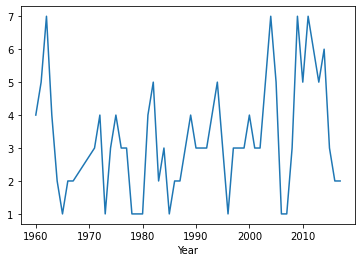

In [133]:
%matplotlib inline
shark[shark["Fatal"]=="Y"].groupby(["Year"]).count()['Fatal'].plot()